In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 
from config import weather_api_key 


In [2]:
# Create a set of random latitudes and longitudes 

lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create latitudes and logitudes as a list 

coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

banda aceh id
rikitea pf
miri my
souillac mu
bom jesus br
tasiilaq gl
victoria sc
rikitea pf
puerto ayora ec
solsvik no
kaitangata nz
ushuaia ar
ushuaia ar
port lincoln au
provideniya ru
illoqqortoormiut gl
aden ye
vanimo pg
arraial do cabo br
kasongo-lunda cd
nioki cd
hilo us
mataura pf
cherskiy ru
rikitea pf
east london za
tarakan id
flinders au
rio gallegos ar
luena ao
lichuan cn
torbay ca
leningradskiy ru
okato nz
bengkulu id
codrington ag
seara br
chanderi in
chokurdakh ru
ramnagar in
waingapu id
mataura pf
half moon bay us
nikolskoye ru
new norfolk au
avera pf
nizhniy baskunchak ru
tasiilaq gl
upernavik gl
taolanaro mg
tasiilaq gl
buraydah sa
geraldton au
tuktoyaktuk ca
east london za
upernavik gl
hervey bay au
vaini to
escanaba us
punta arenas cl
yaan cn
belushya guba ru
kargasok ru
rikitea pf
taolanaro mg
albany au
mys shmidta ru
nago jp
sentyabrskiy ru
busselton au
hobart au
mataura pf
la ronge ca
lugo es
mataura pf
bathsheba bb
yellowknife ca
cherskiy ru
guerrero negro mx
kah

cape town za
port alfred za
buala sb
batagay ru
taolanaro mg
oranjemund na
tasiilaq gl
albany au
kruisfontein za
watsa cd
ponta delgada pt
fort nelson ca
mys shmidta ru
huaibei cn
hobart au
bambous virieux mu
kapaa us
port shepstone za
bageshwar in
longyearbyen sj
busselton au
punta arenas cl
jamestown sh
puerto ayora ec
iqaluit ca
port alfred za
hobart au
arraial do cabo br
upernavik gl
vaini to
iqaluit ca
iquique cl
kapaa us
mys shmidta ru
rikitea pf
morant bay jm
port alfred za
constitucion mx
jamestown sh
opuwo na
ushuaia ar
bluff nz
tsihombe mg
hobart au
rikitea pf
tuktoyaktuk ca
teykovo ru
busselton au
qaqortoq gl
wulanhaote cn
vestmannaeyjar is
mahebourg mu
avarua ck
carutapera br
tuktoyaktuk ca
touros br
vaini to
ushuaia ar
belushya guba ru
manaure co
nanortalik gl
prilep mk
palabuhanratu id
cape town za
hobart au
padang id
souillac mu
hermanus za
belushya guba ru
ferme-neuve ca
dingle ie
vila franca do campo pt
belushya guba ru
chicama pe
bathsheba bb
cherskiy ru
taksimo ru
va

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=838e89412d914b64e1c9eb950d10f13a


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=838e89412d914b64e1c9eb950d10f13a&q=Boston


In [9]:
# 'Get' Request for City Weather 

city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a misspelled city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":62.42,"feels_like":61.32,"temp_min":57.2,"temp_max":64.99,"pressure":1007,"humidity":63},"visibility":10000,"wind":{"speed":10.36,"deg":220},"clouds":{"all":20},"dt":1618106636,"sys":{"type":1,"id":3486,"country":"US","sunrise":1618049451,"sunset":1618096778},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# JSON of Get Request 

city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 62.42,
  'feels_like': 61.32,
  'temp_min': 57.2,
  'temp_max': 64.99,
  'pressure': 1007,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 220},
 'clouds': {'all': 20},
 'dt': 1618106636,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1618049451,
  'sunset': 1618096778},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
if city_weather.status_code == 200:
    print(f"City weather found")
    
else:
    print(f"City weather not found")

City weather found


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 62.42,
  'feels_like': 61.32,
  'temp_min': 57.2,
  'temp_max': 64.99,
  'pressure': 1007,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 220},
 'clouds': {'all': 20},
 'dt': 1618106636,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1618049451,
  'sunset': 1618096778},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
boston_data = city_weather.json()

In [17]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1618049451,
 'sunset': 1618096778}

In [18]:
boston_data['sys']['country']

'US'

In [19]:
boston_data['dt']

1618106636

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 64.99 63 20 10.36


In [21]:
# Import date time 

from datetime import datetime 

# Get the date from JSON 

date = boston_data['dt']

#Convert to MDY format 

datetime.utcfromtimestamp(date)

datetime.datetime(2021, 4, 11, 2, 3, 56)

In [22]:
datetime.utcfromtimestamp(date).strftime('%Y-%M-%D %H:%M:%S')

'2021-03-04/11/21 02:03:56'

In [23]:
# Import Date time 

from datetime import datetime 

In [24]:
# Create empty list for data 

city_data = []

# Print begin message 

print(f"Beginning of Data Retrieval")
print(f"----------------------------")

# Create counters 

record_count = 1 
set_count =1 

for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 & i >= 50):
        set_count+=1
        record_count=1
    #Create URL 
    city_url = url+"&q="+cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count+=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning of Data Retrieval
----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | punta are

Processing Record 174 of Set 1 | punta arenas
Processing Record 175 of Set 1 | punta arenas
Processing Record 176 of Set 1 | punta arenas
Processing Record 177 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 178 of Set 1 | punta arenas
Processing Record 179 of Set 1 | punta arenas
Processing Record 180 of Set 1 | punta arenas
Processing Record 181 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 182 of Set 1 | punta arenas
Processing Record 183 of Set 1 | punta arenas
Processing Record 184 of Set 1 | punta arenas
Processing Record 185 of Set 1 | punta arenas
Processing Record 186 of Set 1 | punta arenas
Processing Record 187 of Set 1 | punta arenas
Processing Record 188 of Set 1 | punta arenas
Processing Record 189 of Set 1 | punta arenas
Processing Record 190 of Set 1 | punta arenas
Processing Record 191 of Set 1 | punta arenas
Processing Record 192 of Set 1 | punta arenas
Processing Record 193 of Set 1 | punta arenas
Processing Record 194 of

Processing Record 342 of Set 1 | punta arenas
Processing Record 343 of Set 1 | punta arenas
Processing Record 344 of Set 1 | punta arenas
Processing Record 345 of Set 1 | punta arenas
Processing Record 346 of Set 1 | punta arenas
Processing Record 347 of Set 1 | punta arenas
Processing Record 348 of Set 1 | punta arenas
Processing Record 349 of Set 1 | punta arenas
Processing Record 350 of Set 1 | punta arenas
Processing Record 351 of Set 1 | punta arenas
Processing Record 352 of Set 1 | punta arenas
Processing Record 353 of Set 1 | punta arenas
Processing Record 354 of Set 1 | punta arenas
Processing Record 355 of Set 1 | punta arenas
Processing Record 356 of Set 1 | punta arenas
Processing Record 357 of Set 1 | punta arenas
Processing Record 358 of Set 1 | punta arenas
Processing Record 359 of Set 1 | punta arenas
Processing Record 360 of Set 1 | punta arenas
Processing Record 361 of Set 1 | punta arenas
Processing Record 362 of Set 1 | punta arenas
Processing Record 363 of Set 1 | p

Processing Record 512 of Set 1 | punta arenas
Processing Record 513 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 514 of Set 1 | punta arenas
Processing Record 515 of Set 1 | punta arenas
Processing Record 516 of Set 1 | punta arenas
Processing Record 517 of Set 1 | punta arenas
Processing Record 518 of Set 1 | punta arenas
Processing Record 519 of Set 1 | punta arenas
Processing Record 520 of Set 1 | punta arenas
Processing Record 521 of Set 1 | punta arenas
Processing Record 522 of Set 1 | punta arenas
Processing Record 523 of Set 1 | punta arenas
Processing Record 524 of Set 1 | punta arenas
Processing Record 525 of Set 1 | punta arenas
Processing Record 526 of Set 1 | punta arenas
Processing Record 527 of Set 1 | punta arenas
Processing Record 528 of Set 1 | punta arenas
Processing Record 529 of Set 1 | punta arenas
Processing Record 530 of Set 1 | punta arenas
Processing Record 531 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 532 of

In [25]:
# Loop through all the cities in the list w/ enumerate.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 647 of Set 1 | banda aceh
Processing Record 648 of Set 1 | rikitea
Processing Record 649 of Set 1 | miri
Processing Record 650 of Set 1 | souillac
Processing Record 651 of Set 1 | bom jesus
Processing Record 652 of Set 1 | tasiilaq
Processing Record 653 of Set 1 | victoria
Processing Record 654 of Set 1 | puerto ayora
Processing Record 655 of Set 1 | solsvik
City not found. Skipping...
Processing Record 656 of Set 1 | kaitangata
Processing Record 657 of Set 1 | ushuaia
Processing Record 658 of Set 1 | port lincoln
Processing Record 659 of Set 1 | provideniya
Processing Record 660 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 661 of Set 1 | aden
Processing Record 662 of Set 1 | vanimo
Processing Record 663 of Set 1 | arraial do cabo
Processing Record 664 of Set 1 | kasongo-lunda
Processing Record 665 of Set 1 | nioki
Processing Record 666 of Set 1 | hilo
Processing Record 667 of Set 1 | mataura
Processing Record 668 of Set 1 | cherskiy
Proce

Processing Record 38 of Set 4 | takhtamygda
Processing Record 39 of Set 4 | antofagasta
Processing Record 40 of Set 4 | monrovia
Processing Record 41 of Set 4 | bud
Processing Record 42 of Set 4 | rawson
Processing Record 43 of Set 4 | gornopravdinsk
Processing Record 44 of Set 4 | malartic
Processing Record 45 of Set 4 | bontang
Processing Record 46 of Set 4 | santa lucia
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | koson
Processing Record 49 of Set 4 | rudbar
Processing Record 50 of Set 4 | dezhou
Processing Record 1 of Set 5 | port hardy
Processing Record 2 of Set 5 | guadalajara
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | castleford
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | prescott
Processing Record 7 of Set 5 | datong
Processing Record 8 of Set 5 | lasa
Processing Record 9 of Set 5 | tarudant
City not found. Skipping...
Processing Record 10 of Set 5 | aswan
Processing Record 11 of Set 5 | hasaki
Processi

Processing Record 27 of Set 8 | barinas
Processing Record 28 of Set 8 | bethel
Processing Record 29 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 30 of Set 8 | nhulunbuy
Processing Record 31 of Set 8 | chester
Processing Record 32 of Set 8 | egvekinot
Processing Record 33 of Set 8 | mafinga
Processing Record 34 of Set 8 | buala
Processing Record 35 of Set 8 | batagay
Processing Record 36 of Set 8 | oranjemund
Processing Record 37 of Set 8 | kruisfontein
Processing Record 38 of Set 8 | watsa
Processing Record 39 of Set 8 | ponta delgada
Processing Record 40 of Set 8 | huaibei
Processing Record 41 of Set 8 | bambous virieux
Processing Record 42 of Set 8 | port shepstone
Processing Record 43 of Set 8 | bageshwar
Processing Record 44 of Set 8 | iquique
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | opuwo
Processing Record 47 of Set 8 | teykovo
Processing Record 48 of Set 8 | qaqortoq
Processing Record 49 of Set 8 | wulanhaote
City not foun

Processing Record 15 of Set 12 | pevek
Processing Record 16 of Set 12 | wuhan
Processing Record 17 of Set 12 | pitimbu
Processing Record 18 of Set 12 | saint-francois
Processing Record 19 of Set 12 | staraya poltavka
Processing Record 20 of Set 12 | zelenogorskiy
Processing Record 21 of Set 12 | jardim
Processing Record 22 of Set 12 | titisee-neustadt
Processing Record 23 of Set 12 | roald
Processing Record 24 of Set 12 | teguldet
Processing Record 25 of Set 12 | hobyo
Processing Record 26 of Set 12 | harwich
Processing Record 27 of Set 12 | zabid
Processing Record 28 of Set 12 | cooma
Processing Record 29 of Set 12 | andreyevka
Processing Record 30 of Set 12 | mayo
Processing Record 31 of Set 12 | ahuimanu
Processing Record 32 of Set 12 | san patricio
Processing Record 33 of Set 12 | diyarb najm
Processing Record 34 of Set 12 | tandil
Processing Record 35 of Set 12 | treinta y tres
Processing Record 36 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 37 of Set 12 | e

In [26]:
# Convert array to Dataframe 

city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,5.5577,95.3222,82.87,74,17,5.35,ID,2021-04-11 02:06:27
1,Punta Arenas,-23.1203,-134.9692,78.67,74,6,11.25,PF,2021-04-11 02:06:27
2,Punta Arenas,4.4148,114.0089,82.40,69,20,5.75,MY,2021-04-11 02:06:28
3,Punta Arenas,-20.5167,57.5167,77.00,83,40,5.75,MU,2021-04-11 02:06:28
4,Punta Arenas,-9.0744,-44.3586,74.14,62,46,2.19,BR,2021-04-11 02:06:28


In [27]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,ID,2021-04-11 02:06:27,5.5577,95.3222,82.87,74,17,5.35
1,Punta Arenas,PF,2021-04-11 02:06:27,-23.1203,-134.9692,78.67,74,6,11.25
2,Punta Arenas,MY,2021-04-11 02:06:28,4.4148,114.0089,82.40,69,20,5.75
3,Punta Arenas,MU,2021-04-11 02:06:28,-20.5167,57.5167,77.00,83,40,5.75
4,Punta Arenas,BR,2021-04-11 02:06:28,-9.0744,-44.3586,74.14,62,46,2.19


In [28]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

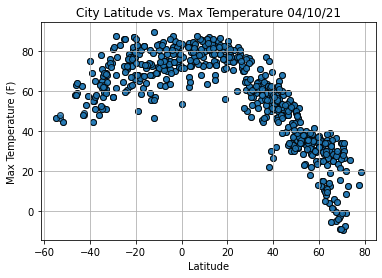

In [30]:
import time 

plt.scatter(lats,max_temps,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

# Format scatter 

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig1.png")

# Show plot.
plt.show()

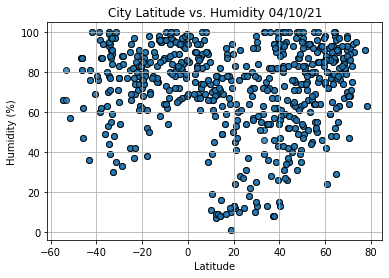

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

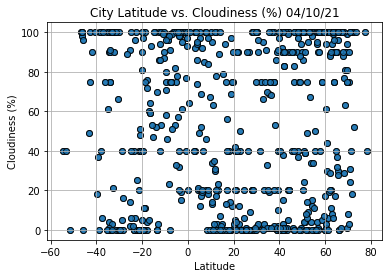

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

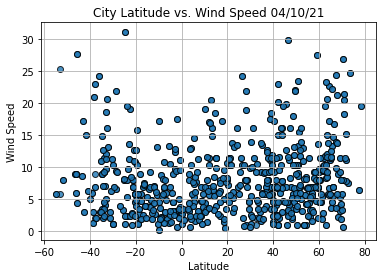

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,ID,2021-04-11 02:06:27,5.5577,95.3222,82.87,74,17,5.35
2,Punta Arenas,MY,2021-04-11 02:06:28,4.4148,114.0089,82.40,69,20,5.75
5,Punta Arenas,GL,2021-04-11 02:06:29,65.6145,-37.6368,30.20,55,30,4.61
6,Punta Arenas,HK,2021-04-11 02:06:24,22.2855,114.1577,75.99,76,12,3.00
11,Punta Arenas,RU,2021-04-11 02:03:29,64.3833,-173.3000,3.70,86,100,22.64


In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    # Run regression on hemisphere weather data.
    (slope,intercept,r_value,p_value,std_error)=linregress(x_values,y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq="y= "+str(round(slope,2))+" x "+str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

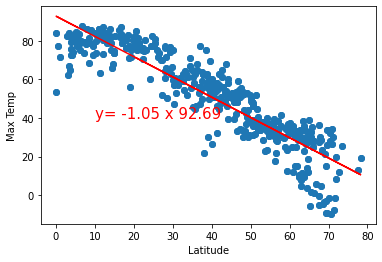

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.

plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature','Max Temp',(10,40))

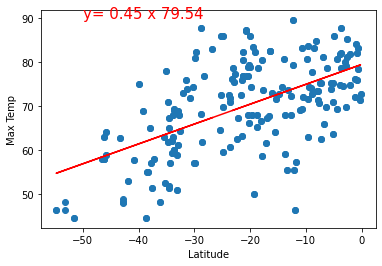

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

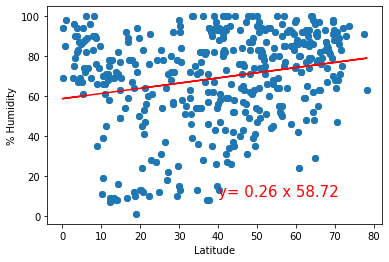

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

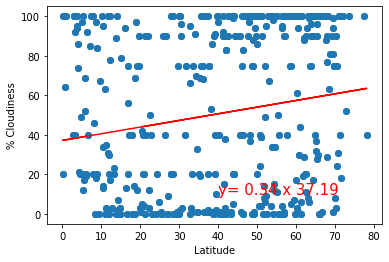

In [39]:

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

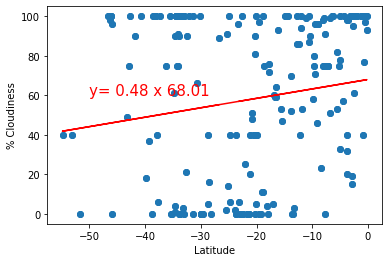

In [40]:
# Plot Cloudiness in Southern 


x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

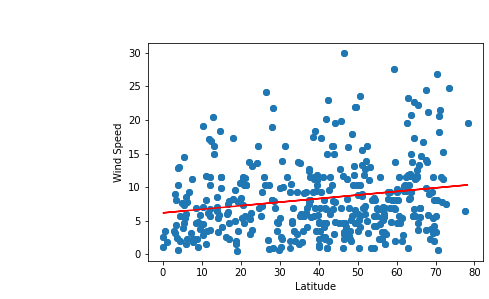

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,35))

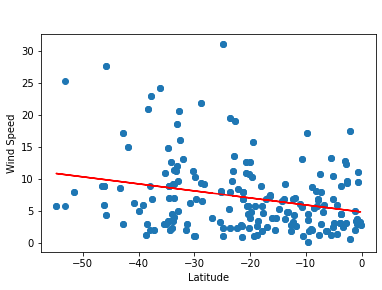

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))